In [18]:
import os
HUGGINGFACE_PATH = "/sc/arion/projects/va-biobank/jamie/phenocode-embeddings/hf-home"
os.environ['HF_HOME'] = HUGGINGFACE_PATH
from sentence_transformers import SentenceTransformer
import torch
import pandas as pd
import ipywidgets as widgets
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt

pd.options.mode.copy_on_write = True
pd.set_option('display.max_rows', 100)

In [11]:
main_dir = '/sc/arion/projects/va-biobank/jamie/phenocode-embeddings'

### Load data sample to inspect

In [3]:
# example embedding dataframe
icd_df = pd.read_parquet(os.path.join(main_dir, 'embeddings/phecodeX/all-MiniLM-L6-v2/icd_embeddings.parquet'))
phecode_df = pd.read_parquet(os.path.join(main_dir, 'embeddings/phecodeX/all-MiniLM-L6-v2/phecode_embeddings.parquet'))
phecode_icd_lookup = pd.read_parquet(os.path.join(main_dir, 'data/processed/phecodeX/phecode_icd_pairs.parquet'))

In [20]:
phecode_icd_lookup[phecode_icd_lookup['phecode']=='MB_284'].to_csv('suicide_codes.csv', index=False)

In [5]:
icd_df

,icd,icd_string,count,flag,icd_embedding
0,001.0,CHOLERA DUE TO VIBRIO CHOLERAE,38,9,"[-0.013960964, -0.012404666, 0.035298143, 0.00..."
1,001.1,CHOLERA DUE TO VIBRIO CHOLERAE EL TOR,176,9,"[-0.015854245, 0.006484969, 0.00934617, -0.010..."
2,001.9,"CHOLERA, UNSPECIFIED",37,9,"[0.010028873, 0.00029568325, 0.011876102, 0.00..."
3,002.0,TYPHOID FEVER,111,9,"[0.030909054, 0.050421484, 0.059235368, -0.061..."
4,002.1,PARATYPHOID FEVER A,2,9,"[0.0008207057, 0.018563112, -0.0100379335, -0...."
...,...,...,...,...,...
66586,Z99.12,Encounter for respirator [ventilator] dependen...,29,10,"[0.027442636, 0.056337703, 0.043732874, 0.0488..."
66587,Z99.2,Dependence on renal dialysis,700145,10,"[-0.056791432, -0.011212857, 0.033733074, 0.00..."
66588,Z99.3,Dependence on wheelchair,23623,10,"[0.004840423, -0.016437892, -0.018282212, 0.03..."
66589,Z99.81,Dependence on supplemental oxygen,108681,10,"[-0.045671407, 0.01986198, 0.002813913, 0.1117..."


In [6]:
phecode_df

,phecode,phecode_string,category_num,category,sex,icd10_only,phecode_num,phecode_embedding
0,ID_001,Salmonella,1,Infections,Both,0,1.0,"[0.007892152, -0.008993458, -0.025621716, 0.04..."
1,ID_002,Staphylococcus,1,Infections,Both,0,2.0,"[-0.00840806, 0.006607678, -0.08385664, -0.003..."
2,ID_002.1,Staphylococcus aureus,1,Infections,Both,0,2.1,"[-0.03247345, 0.019956838, -0.08302549, -0.014..."
3,ID_003,Escherichia coli,1,Infections,Both,0,3.0,"[-0.05302173, -0.07207602, -0.06519161, 0.0276..."
4,ID_004,Streptococcus,1,Infections,Both,0,4.0,"[-0.042547416, -0.062451642, -0.12900501, 0.02..."
...,...,...,...,...,...,...,...,...
3607,GE_981.9,Androgen insensitivity syndrome,18,Genetic,Both,0,981.9,"[-0.02667064, -0.017634654, -0.05561498, 0.076..."
3608,GE_982,"Genetic susceptibility of disease, NOS",18,Genetic,Both,0,982.0,"[-0.028069744, 0.02392912, -0.077104844, 0.064..."
3609,GE_983,Genetic carrier status,18,Genetic,Both,0,983.0,"[-0.034462415, 0.0068744067, -0.06079489, 0.02..."
3610,GE_983.1,Cystic fibrosis carrier,18,Genetic,Both,0,983.1,"[0.03379476, -0.0014098849, -0.023066765, 0.04..."


In [7]:
phecode_icd_lookup

,phecode,icd,flag
0,ID_001,A01.03,10
1,ID_001,A01.09,10
2,ID_001,A02.0,10
3,ID_001,A02.21,10
4,ID_001,002.0,9
...,...,...,...
156667,GE_983,V83.81,9
156668,GE_983.1,V83.81,9
156669,GE_983.1,Z14.1,10
156670,GE_983.2,D57.3,10


Check for repeated PhecodeStrings in phecode_df

In [8]:
repeats = phecode_df[phecode_df['phecode_string'].duplicated(keep=False)]
repeats

,phecode,phecode_string,category_num,category,sex,icd10_only,phecode_num,phecode_embedding
587,EM_218,Polyglandular dysfunction,4,Endocrine/Metab,Both,0,218.0,"[0.016435754, -0.07454623, 0.07865482, 0.01280..."
588,EM_218.2,Polyglandular dysfunction,4,Endocrine/Metab,Both,0,218.2,"[0.016435754, -0.07454623, 0.07865482, 0.01280..."
676,EM_252.5,Disorders of carbohydrate metabolism,4,Endocrine/Metab,Both,0,252.5,"[-0.011570226, -0.009327795, -0.07316806, 0.08..."
3408,GE_964,Disorders of carbohydrate metabolism,18,Genetic,Both,0,964.0,"[-0.011570226, -0.009327795, -0.07316806, 0.08..."


There are not many repeats so we leave it for now

In [9]:
phe_embedding = phecode_df[phecode_df['phecode']=='MB_284.2']['phecode_embedding'].to_numpy()[0]
phecode = phecode_df[phecode_df['phecode']=='MB_284.2']['phecode'].to_numpy()[0]

In [10]:
mask = icd_df["icd_embedding"].notna()

E = np.vstack(icd_df.loc[mask, "icd_embedding"].to_numpy())  # shape (n, d)
sims = E @ phe_embedding  # dot == cosine for unit vectors

icd_sorted = (
    icd_df.loc[mask]
          .assign(cosine_sim=sims)
          .sort_values("cosine_sim", ascending=False)
)

In [11]:
icd_sorted.head(60)

,icd,icd_string,count,flag,icd_embedding,cosine_sim
16374,E958.8,SUICIDE AND SELF-INFLICTED INJURY BY OTHER SPE...,571,9,"[0.06719967, 0.064715646, 0.023818895, 0.02674...",0.880426
16351,E953.8,SUICIDE AND SELF-INFLICTED INJURY BY OTHER SPE...,143,9,"[0.06719967, 0.064715646, 0.023818895, 0.02674...",0.880426
16352,E953.9,SUICIDE AND SELF-INFLICTED INJURY BY UNSPECIFI...,17674,9,"[0.03368594, 0.09021171, 0.02075299, 0.0376815...",0.847724
16375,E958.9,SUICIDE AND SELF-INFLICTED INJURY BY UNSPECIFI...,9662,9,"[0.03368594, 0.09021171, 0.02075299, 0.0376815...",0.847724
33840,R45.88,Nonsuicidal self-harm,169,10,"[0.08471212, 0.028851237, -0.0032952107, 0.056...",0.780855
64425,X83.8XXS,Intentional self-harm by other specified means...,362,10,"[0.0678047, 0.05917424, 0.01720279, 0.04490846...",0.778520
16368,E958.1,"SUICIDE AND SELF-INFLICTED INJURY BY BURNS, FIRE",118,9,"[0.015237749, 0.08115545, 0.0406228, 0.0723188...",0.771788
16372,E958.5,SUICIDE AND SELF-INFLICTED INJURY BY CRASHING ...,166,9,"[0.030677134, 0.057344977, 0.04696924, 0.02146...",0.760730
16337,E950.4,SUICIDE AND SELF-INFLICTED POISONING BY OTHER ...,2237,9,"[0.0729577, 0.0049561826, -0.019205954, 0.0328...",0.751638
16338,E950.5,SUICIDE AND SELF-INFLICTED POISONING BY UNSPEC...,1515,9,"[0.054984584, 0.043425046, -0.0060842074, 0.02...",0.747089


In [20]:
icd_sorted[icd_sorted['Phecode']!=phecode].head(60)

,ICD,ICDString,Flag,Phecode,icd_embedding,cosine_sim
57674,R45.88,Nonsuicidal self-harm,10.0,MB_284.3,"[-0.02923487, 0.03412488, -0.034503102, -0.049...",0.809456
28222,E956.,SUICIDE AND SELF-INFLICTED INJURY BY CUTTING A...,9.0,NaN,"[-0.0022442276, -0.02717821, -0.004183949, -0....",0.764458
57669,R45.85,Homicidal and suicidal ideations,10.0,MB_309,"[-0.02824384, -0.0060670706, 0.012871696, -0.0...",0.752013
103692,Z91.52,Personal history of nonsuicidal self-harm,10.0,NaN,"[-0.029482186, 0.0070329835, -0.052222885, -0....",0.737027
99371,V62.84,Suicidal ideation,9.0,MB_284.1,"[-0.043759152, 0.00068201893, 0.0043422235, -0...",0.700183
57671,R45.851,Suicidal ideations,10.0,MB_284.1,"[-0.038037892, 0.0028747148, 0.008995211, -0.0...",0.695274
103691,Z91.51,Personal history of suicidal behavior,10.0,NaN,"[-0.028693348, 0.029520074, -0.03092506, -0.04...",0.694362
28248,E963.,ASSAULT BY HANGING AND STRANGULATION,9.0,NaN,"[-0.04963061, -0.0021966035, -0.047011584, -0....",0.650488
28210,E954.,SUICIDE AND SELF-INFLICTED INJURY BY SUBMERSIO...,9.0,NaN,"[-0.051930666, 0.031062696, 0.0004075437, -0.0...",0.638825
99372,V62.85,Homicidal ideation,9.0,MB_309.8,"[-0.0238403, 0.015050294, -0.0076529123, -0.03...",0.604640


In [21]:
phe_embedding = phecode_df[phecode_df['Phecode']=='MB_293']['phecode_embedding'].to_numpy()[0]
phecode = phecode_df[phecode_df['Phecode']=='MB_293']['Phecode'].to_numpy()[0]

In [22]:
mask = icd_df["icd_embedding"].notna()

E = np.vstack(icd_df.loc[mask, "icd_embedding"].to_numpy())  # shape (n, d)
sims = E @ phe_embedding  # dot == cosine for unit vectors

icd_sorted = (
    icd_df.loc[mask]
          .assign(cosine_sim=sims)
          .sort_values("cosine_sim", ascending=False)
)

In [23]:
icd_sorted.head(60)

,ICD,ICDString,Flag,Phecode,icd_embedding,cosine_sim
29936,F50,Eating disorders,10.0,MB_293,"[0.012874278, -0.0022714369, -0.032105703, -0....",1.000000
6821,307.50,Eating disorder NOS,9.0,MB_293,"[0.030067086, 0.0017654059, -0.042153876, -0.0...",0.970862
29946,F50.9,"Eating disorder, unspecified",10.0,MB_293,"[0.027619015, 0.0008474413, -0.04061359, -0.04...",0.918041
29942,F50.8,Other eating disorders,10.0,MB_293,"[0.033355806, 0.01819588, -0.019825894, -0.036...",0.850642
6827,307.59,Eating disorder NEC,9.0,MB_293,"[0.014913512, 0.010797764, -0.02032253, -0.058...",0.810986
29943,F50.81,Binge eating disorder,10.0,MB_293.3,"[0.018938808, 0.0019112737, -0.08181628, -0.01...",0.786048
99506,V69.1,Inappropriate diet and eating habits,9.0,MB_283.8,"[0.021240754, 0.01359894, -0.015176597, -0.020...",0.766068
103120,Z72.4,Inappropriate diet and eating habits,10.0,MB_283.8,"[0.02124078, 0.013599009, -0.015176581, -0.020...",0.766068
6820,307.5,Other and unspecified disorders of eating,9.0,MB_293,"[0.039280135, 0.013581255, -0.020352762, -0.02...",0.760588
57772,R63.0,Anorexia,10.0,EM_230.3,"[-0.031361677, -0.0012321232, -0.03625655, -0....",0.747885


In [24]:
icd_sorted[icd_sorted['Phecode']!=phecode].head(60)

,ICD,ICDString,Flag,Phecode,icd_embedding,cosine_sim
29943,F50.81,Binge eating disorder,10.0,MB_293.3,"[0.018938808, 0.0019112737, -0.08181628, -0.01...",0.786048
99506,V69.1,Inappropriate diet and eating habits,9.0,MB_283.8,"[0.021240754, 0.01359894, -0.015176597, -0.020...",0.766068
103120,Z72.4,Inappropriate diet and eating habits,10.0,MB_283.8,"[0.02124078, 0.013599009, -0.015176581, -0.020...",0.766068
57772,R63.0,Anorexia,10.0,EM_230.3,"[-0.031361677, -0.0012321232, -0.03625655, -0....",0.747885
15519,783.0,Anorexia,9.0,EM_230.3,"[-0.031361677, -0.0012321232, -0.03625655, -0....",0.747885
30015,F63,Impulse disorders,10.0,MB_298,"[-0.02125214, 0.016558435, -0.031765524, -0.01...",0.744179
29921,F45.22,Body dysmorphic disorder,10.0,MB_291,"[0.02565435, -0.006339938, -0.013042014, -0.02...",0.693713
6802,307.1,Anorexia nervosa,9.0,MB_293.1,"[-0.01848193, -0.012569895, -0.04359751, -0.05...",0.685062
29937,F50.0,Anorexia nervosa,10.0,MB_293.1,"[-0.01848193, -0.012569895, -0.04359751, -0.05...",0.685062
6004,278.02,Overweight,9.0,EM_236,"[-0.015461329, -0.010138909, -0.041670747, -0....",0.675654


### Download LLMs

In [13]:
embedding_dir = os.path.join(main_dir, 'embeddings/phecodeX')
models = [
    # "Alibaba-NLP/gte-Qwen2-7B-instruct", # best model on MTEB leaderboard (Medical)
    "infly/inf-retriever-v1", # best model on MTEB leaderboard (Medical) for information retrieval
    "all-MiniLM-L6-v2", # original SentenceTransformer model: best across all datasets tested. No clinical motivation (train or evaluation)
    # "sentence-t5-xxl",  # original SentenceTransformer model: tuned for sentence embedding task. No clinical motivation (train or evaluation)
    # "multi-qa-mpnet-base-dot-v1", # original SentenceTransformer model: tuned for semantic search task. No clinical motivation (train or evaluation)
    # "NeuML/pubmedbert-base-embeddings",  # trained on PubMed
    "FremyCompany/BioLORD-2023",  # model trained specifically on clinical sentences and biomedical concepts
]

In [ ]:
for model_name in models:
    model = SentenceTransformer(model_name, device="cpu")  

### Testing

In [106]:
icd_code_lookup = pd.read_parquet(os.path.join(main_dir, 'data/processed/phecodeX/phecode_icd_pairs.parquet'))

# specific_phecode = "MB_293"  # eating disorders
# specific_phecode = "MB_287.1"  # scz
# specific_phecode = "MB_286.1"  # bipolar
# specific_phecode = "MB_280.2"  # opioid use disorders
# specific_phecode = "MB_280.11"  # Alcohol abuse and dependence
specific_phecode = "MB_296"  # personality disorders
# specific_phecode = "MB_284"  # suicide
# specific_phecode = None

# specific_model = "FremyCompany/BioLORD-2023"
specific_model = None

specific_category = None
# specific_category = 'Mental'

In [107]:
import os
import numpy as np
from sklearn.metrics import precision_recall_curve, average_precision_score
from joblib import Parallel, delayed

model_metrics = {}
model_topk_points = {}
icd_sorteds = []
ppvs = {}

def compute_phecode_result(phecode, phecode_df, icd_df, mask, E, icd_code_lookup):
    """Evaluate one phecode: returns precision, recall, y_true, scores, AP, phecode, sorted ICDs, min_k_ppv_50."""
    phe_embedding = phecode_df.loc[phecode_df['phecode'] == phecode, 'phecode_embedding'].to_numpy()[0]
    sims = E @ phe_embedding  # dot == cosine if unit vectors

    icd_sorted = (
        icd_df.loc[mask]
              .assign(cosine_sim=sims)
              .sort_values("cosine_sim", ascending=False)
              .copy()
    )

    relevant_icds = icd_code_lookup.loc[icd_code_lookup['phecode'] == phecode, 'icd'].tolist()
    icd_sorted['label'] = icd_sorted['icd'].isin(relevant_icds).astype(int)
    y_true = icd_sorted['label'].to_numpy(dtype=int)

    # rank-coded scores for stable Top-K & AP: n, n-1, ..., 1
    scores = np.arange(len(y_true), 0, -1)

    precision, recall, _ = precision_recall_curve(y_true, scores)
    ap = average_precision_score(y_true, scores) if y_true.sum() > 0 else np.nan

    # Find minimum rank K where precision >= 0.5
    # Cumulative precision at top K = cumsum(label) / K
    cumsum_tp = np.cumsum(y_true)
    ks = np.arange(1, len(y_true)+1)
    precision_at_k = cumsum_tp / ks
    mask_ppv50 = precision_at_k <= 0.5

    max_k_ppv_50 = ks[mask_ppv50][0] if np.any(mask_ppv50) else np.nan

    return precision, recall, y_true, scores, ap, phecode, icd_sorted, max_k_ppv_50

def topk_micro_points(y_all, s_all, ks):
    """Compute micro precision/recall at given top-K thresholds assuming rank-coded scores."""
    n_per_query = len(s_all)  # each per-phecode ranking has same length
    total_positives = y_all.sum()
    if total_positives == 0:
        return []
    pts = []
    for K in ks:
        if K > n_per_query:
            continue
        thr = n_per_query - K + 1
        sel = s_all >= thr
        tp = int(y_all[sel].sum())
        precision = tp / max(int(sel.sum()), 1)
        recall = tp / total_positives
        pts.append((K, recall, precision))
    return pts

for model_name in models:
    if specific_model and specific_model != model_name:
        continue  # skip unless this is the target model

    path = os.path.join(embedding_dir, model_name.split('/')[-1])
    icd_df = pd.read_parquet(os.path.join(path, 'icd_embeddings.parquet'))
    phecode_df = pd.read_parquet(os.path.join(path, 'phecode_embeddings.parquet'))

    if specific_category:
        phecode_df = phecode_df[phecode_df['category']==specific_category]

    # restrict ICDs if desired (quick fix comment in original)
    icd_df = icd_df[~icd_df['outpat_count'].isna()]
    # icd_df = icd_df[icd_df['icd'].isin(phecode_icd_lookup['icd'])]  #  remove MVP codes for benchmark

    if specific_phecode:
        phecode_df = phecode_df[phecode_df['phecode'] == specific_phecode]

    # drop NaNs and only keep phecodes that have at least one relevant ICD
    phecodes = phecode_df['phecode'].dropna().unique().tolist()
    valid_phecodes = icd_code_lookup.loc[icd_code_lookup['phecode'].isin(phecodes), 'phecode'].unique()
    phecodes = [p for p in phecodes if p in valid_phecodes]

    if not phecodes:
        continue  # nothing to evaluate

    mask = icd_df['icd_embedding'].notna().to_numpy()
    E = np.vstack(icd_df.loc[mask, 'icd_embedding'].to_numpy())

    # parallel per-phecode evaluation
    results = Parallel(n_jobs=-1, prefer="threads", verbose=1)(
        delayed(compute_phecode_result)(
            phecode, phecode_df, icd_df, mask, E, icd_code_lookup
        ) for phecode in phecodes
    )

    # filter out degenerate results (original logic: drop if precision is all 1)
    filtered = [r for r in results if not np.all(r[0] == 1)]

    if not filtered:
        continue

    # unpack
    y_pool = [r[2] for r in filtered]
    s_pool = [r[3] for r in filtered]
    ap_map = {r[5]: r[4] for r in filtered}
    all_curves = [(r[1], r[0]) for r in filtered]  # (recall, precision)
    icd_sorted = filtered[0][6]
    icd_sorted['max_rank_ppv_50'] = filtered[0][7]

    # micro-average across phecodes
    y_all = np.concatenate(y_pool)
    s_all = np.concatenate(s_pool)
    precision_micro, recall_micro, _ = precision_recall_curve(y_all, s_all)
    ap_micro = average_precision_score(y_all, s_all)

    model_metrics[model_name] = (precision_micro, recall_micro, ap_micro, ap_map)

    if specific_model and specific_model == model_name:
        phecode_df['AP'] = phecode_df['phecode'].map(ap_map)

    icd_sorted['model_name'] = model_name.split('/')[-1]
    icd_sorteds.append(icd_sorted)

    # Top-K micro points
    KS = [10, 100, 1000]
    model_topk_points[model_name] = topk_micro_points(y_all, s_all, KS)

icd_df = pd.concat(icd_sorteds, axis=0)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


### save spreadsheets for Simone

Generate for specific_phecode = 'MB_293' (Eating disorders), 'MB_287.1' (Schizophrenia), 'MB_286.1' (Bipolar disorder).

Models used: "FremyCompany/BioLORD-2023", "infly/inf-retriever-v1", and "all-MiniLM-L6-v2" based on performance results. 

In [108]:
# 1) Make a per-model rank (highest score = rank 1)
icd_df_temp = (
    icd_df.copy()
    .sort_values(['model_name', 'cosine_sim'], ascending=[True, False])
    .assign(rank=lambda d: d.groupby('model_name').cumcount() + 1)
).drop(['icd_embedding'], axis=1)

# 2) Broadcast K per model to all its rows
K = icd_df_temp.groupby('model_name')['max_rank_ppv_50'].transform('first')

# 3) Keep only top-K rows per model
icd_df_topk = icd_df_temp.loc[K.notna() & (icd_df_temp['rank'] <= K)].copy()
icd_df_phecode = icd_df_temp[icd_df_temp['label']==1]

icd_combined = pd.concat([icd_df_topk, icd_df_phecode], axis=0)
icd_combined = icd_combined.drop_duplicates()

icd_df_trunc = icd_combined[['icd', 'icd_string', 'flag']].drop_duplicates()

icd_df_trunc = icd_df_trunc.sample(frac=1, random_state=42).reset_index(drop=True)


In [109]:
icd_df_trunc[icd_df_trunc['icd']=='295.15']

,icd,icd_string,flag


Codes I forgot to include from the Phecode labels

In [110]:
df1 = icd_df_topk[['icd', 'icd_string', 'flag']].drop_duplicates()
df2 = icd_df_phecode[['icd', 'icd_string', 'flag']].drop_duplicates()

# turn df1 rows into a set of tuples
tuples1 = set(df1.itertuples(index=False, name=None))

# boolean mask for df2 rows not in that set
mask = [row not in tuples1 for row in df2.itertuples(index=False, name=None)]

diff = df2.loc[mask]
diff.sample(frac=1, random_state=42).reset_index(drop=True)

,icd,icd_string,flag
0,301.84,PASSIVE-AGGRESSIVE PERSONALITY,9
1,301.21,INTROVERTED PERSONALITY,9


In [105]:
phenotype = "personality_disorders"
validation_path = f"/sc/arion/projects/va-biobank/jamie/phenocode-embeddings/validation/{phenotype}"
os.makedirs(validation_path, exist_ok=True)
icd_df_trunc.to_excel(os.path.join(validation_path, f"{phenotype}.xlsx"), index=False)
icd_combined.to_parquet(os.path.join(validation_path, f"{phenotype}_full.parquet"), index=False)

In [9]:
# icd_df = icd_df[['icd', 'icd_string', 'flag', 'label']]
icd_df.drop('icd_embedding', axis=1).to_csv('suicide_results.csv', index=False)

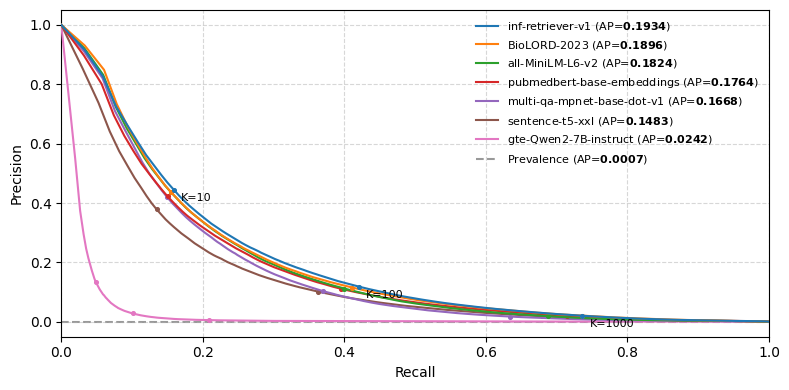

In [169]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 4))

# sort by AP for legend
if specific_model:
    sorted_models = [specific_model]
else:
    sorted_models = sorted(models, key=lambda m: model_metrics[m][2], reverse=True)

# assign zorders so best model has the highest z
# (use large base so it sits above grid/baseline etc.)
n = len(sorted_models)
zorders = {m: 10 + (n - i) for i, m in enumerate(sorted_models)}  # best -> biggest

# plot curves and remember colors
colors = {}
for model_name in sorted_models:
    P_micro, R_micro, ap_micro = model_metrics[model_name]
    label = rf"{model_name.split('/')[-1]} (AP=$\mathbf{{{ap_micro:.4f}}}$)"
    z = zorders[model_name]
    line, = ax.plot(R_micro, P_micro, label=label, linewidth=1.5, zorder=z)
    colors[model_name] = line.get_color()

# add Top‑K markers (same color as each curve), slightly above its line
for model_name in sorted_models:
    z = zorders[model_name] + 0.1
    for K, r, p in model_topk_points[model_name]:
        ax.scatter(r, p, color=colors[model_name], s=7, zorder=z)

# annotate only for the best model; keep annotation on top as well
best = sorted_models[0]
for K, r, p in model_topk_points[best]:
    ax.annotate(f"K={K}", (r, p), xytext=(5, -8),
                textcoords="offset points", fontsize=8, zorder=zorders[best] + 0.2)

baseline = y_all.mean()
ax.axhline(baseline, color='black', ls='--', alpha=0.4,
           label=f'Prevalence (AP=$\mathbf{{{baseline:.4f}}}$)', zorder=0)

ax.set_xlabel("Recall")
ax.set_ylabel("Precision")
ax.set_xlim(0, 1)
ax.set_ylim(-0.05, 1.05)
ax.grid(True, linestyle="--", alpha=0.5)
ax.legend(frameon=False, loc="best", fontsize=8)
plt.tight_layout()
# plt.title('Eating disorders')


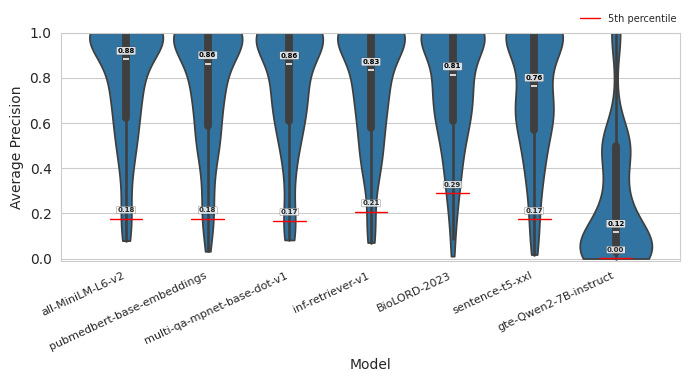

In [160]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# build long-form DataFrame: assume model_metrics[model] = (P_micro, R_micro, ap_micro, ap_map)
rows = []
for model_name, (P_micro, R_micro, ap_micro, ap_map) in model_metrics.items():
    short_name = model_name.split('/')[-1]
    for phecode, ap in ap_map.items():
        if pd.isna(ap):
            continue
        rows.append({
            "model": short_name,
            "phecode": phecode,
            "avg_precision": ap,
            "micro_ap": ap_micro
        })
df = pd.DataFrame(rows)
if df.empty:
    raise RuntimeError("No AP data available in model_metrics to plot.")

# order models by median AP descending for consistent x-axis
order = df.groupby("model")["avg_precision"].median().sort_values(ascending=False).index.tolist()

plt.figure(figsize=(7, 4))
sns.set_style("whitegrid")

# violin plot
sns.violinplot(
    data=df,
    x="model",
    y="avg_precision",
    order=order,
    inner='box',
    cut=0,
    width=0.9,
    density_norm='area'
)



# add 5th percentile bar per model
p5 = df.groupby("model")["avg_precision"].quantile(0.05).reindex(order)
ax = plt.gca()
for i, model in enumerate(order):
    y5 = p5.loc[model]
    ax.plot([i - 0.2, i + 0.2], [y5, y5], color="red", lw=1)
    ax.annotate(
        f"{y5:.2f}",
        xy=(i, y5),
        xytext=(0, 4), textcoords="offset points",
        ha="center", va="bottom",
        fontsize=5, fontweight="bold",
        bbox=dict(boxstyle="round,pad=0.1", fc="white", ec="black", lw=0.2, alpha=0.8),
        clip_on=False, zorder=10
    )

# add legend entry for 5th percentile
from matplotlib.lines import Line2D
legend_handles = [Line2D([0], [0], color="red", lw=1, label="5th percentile")]
ax.legend(handles=legend_handles, loc="upper right", 
    bbox_to_anchor=(1, 1.1),
    borderaxespad=0,frameon=False, fontsize=7)

# annotate 5th percentile on each violin


# annotate median values on each violin
medians = df.groupby("model")["avg_precision"].median().reindex(order)
for i, model in enumerate(order):
    y_med = medians.loc[model]
    ax.annotate(
        f"{y_med:.2f}",
        xy=(i, y_med),             # anchor at the median (data coords)
        xytext=(0, 4),             # offset: 0 px horizontally, +8 px vertically
        textcoords="offset points",
        ha="center", va="bottom",
        fontsize=5, fontweight="bold",
        color="black",
        bbox=dict(boxstyle="round,pad=0.15", fc="white", ec="black", lw=0.2, alpha=0.8),
        zorder=10,
        clip_on=False,             # avoids clipping if near the top
    )

plt.ylim(-0.01, 1)
plt.xlabel("Model")
plt.ylabel("Average Precision")
plt.xticks(rotation=25, ha="right", fontsize=8)
plt.tight_layout()

plt.savefig("ap_violins.png", dpi=300, bbox_inches="tight", transparent=True)




In [15]:
df

,Alibaba-NLP/gte-Qwen2-7B-instruct,infly/inf-retriever-v1,all-MiniLM-L6-v2,sentence-t5-xxl,multi-qa-mpnet-base-dot-v1,NeuML/pubmedbert-base-embeddings,FremyCompany/BioLORD-2023
0,0.024152,0.193428,0.182423,0.148297,0.166773,0.176397,0.189648


In [164]:
counts = (
    icd_code_lookup
    .dropna(subset=["phecode", "icd"])
    .drop_duplicates()
    .groupby("phecode")["icd"]
    .nunique()
)
phecode_df["n_icd_codes"] = phecode_df["phecode"].map(counts).fillna(0).astype(int)
# phecode_df[phecode_df['n_icd_codes']>50].sort_values(by='AP', ascending=True).head(60)[['phecode', 'phecode_string', 'AP', 'n_icd_codes']]

In [174]:
ap_map

{'MB_280': 0.8041362584373059,
 'MB_280.1': 0.8254343031993839,
 'MB_280.11': 0.6452729122307959,
 'MB_280.13': 0.9149824032176972,
 'MB_280.2': 0.6409144834766183,
 'MB_280.21': 0.5442565779524393,
 'MB_280.3': 0.8969778032932866,
 'MB_280.31': 0.8181541314749484,
 'MB_280.4': 0.7230339249411124,
 'MB_280.41': 0.665458124765067,
 'MB_280.5': 0.5677905878148914,
 'MB_280.51': 0.47772566820398704,
 'MB_280.7': 0.6540321482960815,
 'MB_280.71': 0.5386616189282666,
 'MB_280.8': 0.36324880805951215,
 'MB_280.9': 0.7409480729131417,
 'MB_280.91': 0.563177492781337,
 'MB_281': 0.22403381797953015,
 'MB_282': 0.849548220990512,
 'MB_282.1': 0.6465017572407863,
 'MB_282.2': 1.0,
 'MB_283': 0.11448942120763114,
 'MB_283.1': 0.4185912232600878,
 'MB_283.3': 1.0,
 'MB_283.4': 0.7707097941187029,
 'MB_283.8': 0.6750536119797912,
 'MB_284': 0.9726486185231423,
 'MB_284.1': 1.0,
 'MB_284.2': 0.9386063507212316,
 'MB_284.3': 1.0,
 'MB_286': 0.4656378162198807,
 'MB_286.1': 0.6398943901371579,
 'MB_28

In [181]:
pd.set_option("display.max_rows", None)
test = phecode_df[(phecode_df['category']=='Mental')]
test["AP"] = test["phecode"].map(ap_map)
test = test.dropna()
test = test.drop(['phecode_embedding'], axis=1)

In [185]:
test.to_excel('phecode_mental.xlsm', index=False)

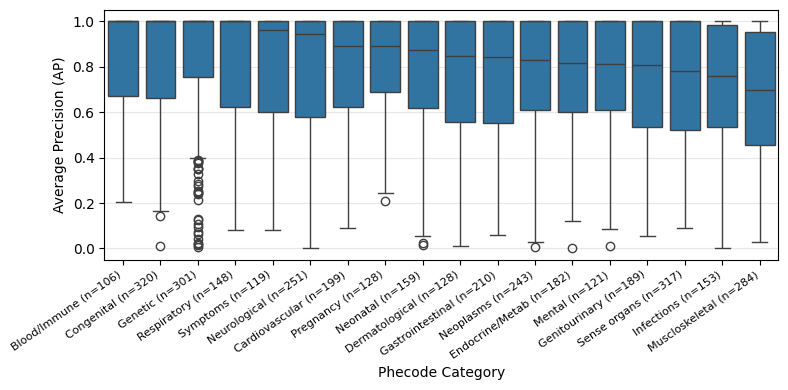

In [182]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data
df = phecode_df[['category', 'AP']].dropna().copy()

# (Optional) drop sparse categories
min_n = 5
counts = df['category'].value_counts()
keep = counts[counts >= min_n].index
df = df[df['category'].isin(keep)]
counts = df['category'].value_counts()  # refresh after filtering

# Order by median AP (desc)
order = (
    df.groupby('category')['AP']
      .median()
      .sort_values(ascending=False)
      .index
)

# Plot
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='category', y='AP', order=order)

# Add counts under each category name
label_map = {cat: f"{cat} (n={counts[cat]})" for cat in order}
plt.xticks(ticks=range(len(order)), labels=[label_map[c] for c in order], rotation=35, ha='right', fontsize=8)

plt.xlabel('Phecode Category')
plt.ylabel('Average Precision (AP)')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


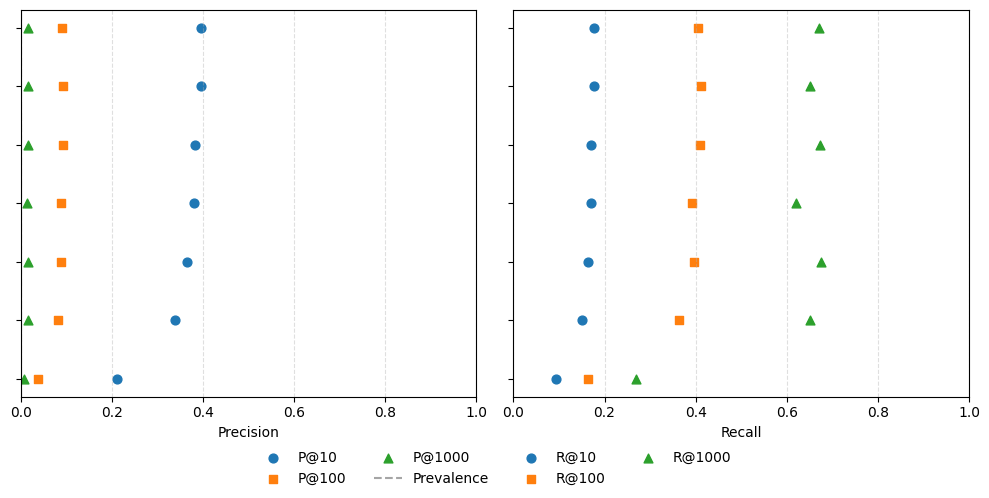

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Choose the K’s you care about
Ks = (10, 100, 1000)

# Order models best→worst by AP (for consistency), but we won't display AP
order = sorted(models, key=lambda m: model_metrics[m][2], reverse=True)
ypos = np.arange(len(order))[::-1]
labels = [m.split('/')[-1] for m in order]

def p_at_k(model, K):
    for k, r, p in model_topk_points[model]:
        if k == K:
            return p
    return np.nan

def r_at_k(model, K):
    for k, r, p in model_topk_points[model]:
        if k == K:
            return r
    return np.nan

fig, (axP, axR) = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
markers = ['o', 's', '^', 'D', 'P', 'X']  # distinct markers for K’s

# Precision@K (left)
for j, K in enumerate(Ks):
    xs = [p_at_k(m, K) for m in order]
    axP.scatter(xs, ypos, s=40, marker=markers[j % len(markers)], label=f"P@{K}")
axP.set_yticks(ypos); axP.set_yticklabels(labels)
axP.set_xlabel("Precision"); axP.set_xlim(0, 1)
axP.grid(True, axis='x', ls='--', alpha=0.4)

# Optional: prevalence baseline on precision panel
baseline = y_all.mean()
axP.axvline(baseline, ls='--', color='0.3', alpha=0.5, label="Prevalence")

# Recall@K (right)
for j, K in enumerate(Ks):
    xs = [r_at_k(m, K) for m in order]
    axR.scatter(xs, ypos, s=40, marker=markers[j % len(markers)], label=f"R@{K}")
axR.set_xlabel("Recall"); axR.set_xlim(0, 1)
axR.grid(True, axis='x', ls='--', alpha=0.4)
axR.set_yticklabels([])  # hide duplicate labels on right

# One shared legend for both subplots
handlesP, labelsP = axP.get_legend_handles_labels()
handlesR, labelsR = axR.get_legend_handles_labels()
by_label = dict(zip(labelsP + labelsR, handlesP + handlesR))
fig.legend(by_label.values(), by_label.keys(), loc='lower center',
           ncol=len(Ks) + 1, frameon=False)  # +1 for prevalence line
plt.tight_layout(rect=(0, 0.08, 1, 1))
plt.show()


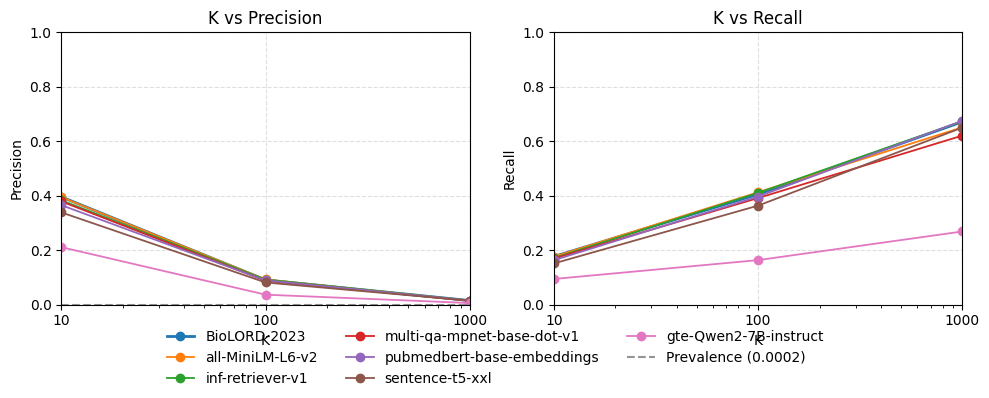

In [27]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# Order models best→worst (any order is fine; AP is just for sorting, not displayed)
order = sorted(models, key=lambda m: model_metrics[m][2], reverse=True)

# Collect all K’s to use as x‑ticks
all_K = sorted({k for m in order for (k, _, _) in model_topk_points[m]})

fig, (axP, axR) = plt.subplots(1, 2, figsize=(10, 4), sharex=True)

for i, m in enumerate(order):
    pts = sorted(model_topk_points[m], key=lambda t: t[0])  # (K, recall, precision)
    Ks  = [k for k, _, _ in pts]
    Ps  = [p for _, _, p in pts]
    Rs  = [r for _, r, _ in pts]
    lw  = 2.0 if i == 0 else 1.3  # slightly thicker for the top model
    lbl = m.split('/')[-1]

    axP.plot(Ks, Ps, marker='o', linewidth=lw, label=lbl)
    axR.plot(Ks, Rs, marker='o', linewidth=lw, label=lbl)

# Axes formatting
for ax in (axP, axR):
    ax.set_xscale('log', base=10)
    ax.set_xticks(all_K)
    ax.get_xaxis().set_major_formatter(ScalarFormatter())  # show 10, 100, 1000
    ax.set_xlim(min(all_K), max(all_K))
    ax.set_ylim(0, 1)
    ax.grid(True, axis='both', linestyle='--', alpha=0.4)

# Labels/titles
axP.set_title("K vs Precision"); axP.set_xlabel("K"); axP.set_ylabel("Precision")
axR.set_title("K vs Recall");    axR.set_xlabel("K"); axR.set_ylabel("Recall")

# Optional: prevalence baseline on precision panel
baseline = y_all.mean()
axP.axhline(baseline, ls='--', color='0.3', alpha=0.6, label=f"Prevalence ({baseline:.4f})")

# Shared legend below
handlesP, labelsP = axP.get_legend_handles_labels()
fig.legend(handlesP, labelsP, loc='lower center', ncol=3, frameon=False)
plt.tight_layout(rect=(0, 0.08, 1, 1))
plt.show()


In [30]:
baseline

np.float64(0.00021567061239205498)

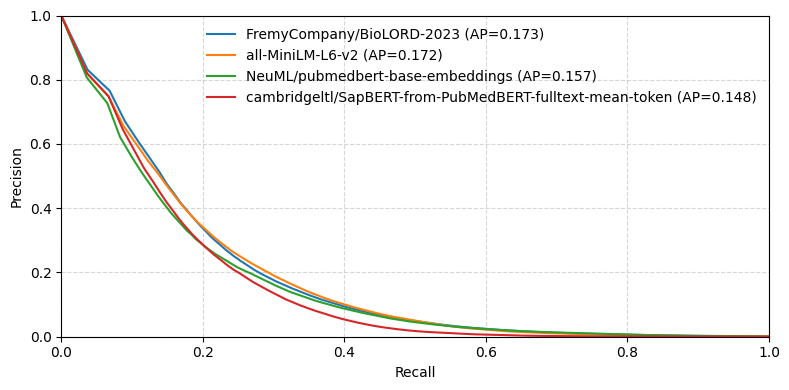

In [14]:
plt.figure(figsize=(8, 4))

# Sort models by AP_micro descending for cleaner legend
sorted_models = sorted(models, key=lambda m: model_metrics[m][2], reverse=True)

for model_name in sorted_models:
    P_micro, R_micro, ap_micro = model_metrics[model_name]
    label = f"{model_name} (AP={ap_micro:.3f})"
    plt.plot(R_micro, P_micro, label=label)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(frameon=False)
plt.tight_layout()
plt.show()

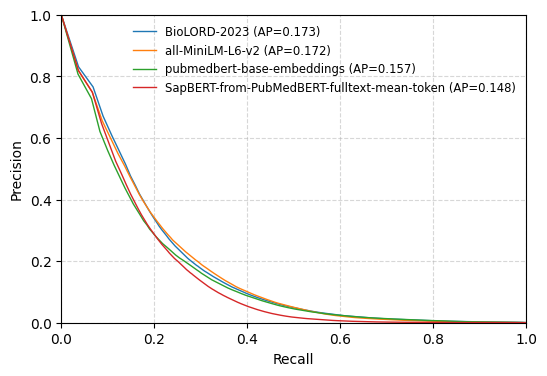

In [97]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

fig, ax = plt.subplots(figsize=(6, 4))

# Sort models by AP_micro descending for cleaner legend
sorted_models = sorted(models, key=lambda m: model_metrics[m][2], reverse=True)

# Plot main curves and remember colors so inset matches
colors = {}
for model_name in sorted_models:
    P_micro, R_micro, ap_micro = model_metrics[model_name]
    label = f"{model_name.split('/')[-1]} (AP={ap_micro:.3f})"
    line, = ax.plot(R_micro, P_micro, label=label, linewidth=1)
    colors[model_name] = line.get_color()

# Main plot formatting
ax.set_xlabel("Recall")
ax.set_ylabel("Precision")
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.grid(True, linestyle="--", alpha=0.5)
ax.legend(frameon=False, loc="upper right", fontsize="small")

# # Inset: place at center-right of the main axes
# axins = inset_axes(ax, width="25%", height="40%", loc="center", borderpad=1)

# # Plot same curves in inset using the SAME colors
# for model_name in sorted_models:
#     P_micro, R_micro, _ = model_metrics[model_name]
#     axins.plot(R_micro, P_micro, color=colors[model_name], linewidth=1.2)

# # Zoomed limits and tidy ticks
# axins.set_xlim(0, 0.1)
# axins.set_ylim(0.75, 1.0)
# axins.set_xticks([0.0, 0.05, 0.1])
# axins.set_yticks([0.8, 0.9, 1.0])
# axins.grid
# axins.set_zorder(10)  

# pp, c1, c2 = mark_inset(
#     ax, axins, loc1=2, loc2=4,
#     fc="none", ec="gray", lw=0.5, zorder=1
# )

In [9]:
rng = np.random.default_rng(42)
reducer = umap.UMAP(
    n_components=2,
    metric="cosine",
    # random_state=rng.integers(0, 1 << 32),
    n_jobs=-1
)
xy = reducer.fit_transform(embeddings)                             # (N, 2)
df["UMAP_1"], df["UMAP_2"] = xy[:, 0], xy[:, 1]

In [14]:
df

,ICDCode,ICDDescription,CodeType,Count,embedding,UMAP_1,UMAP_2
1,001.0,CHOLERA DUE TO VIBRIO CHOLERAE,ICD9,38,"[-0.013960958, -0.012404625, 0.03529811, 0.000...",0.886934,3.769246
2,001.1,CHOLERA DUE TO VIBRIO CHOLERAE EL TOR,ICD9,176,"[-0.015854286, 0.006485013, 0.009346179, -0.01...",0.895496,3.766958
3,001.9,"CHOLERA, UNSPECIFIED",ICD9,37,"[0.010028838, 0.00029562533, 0.011876065, 0.00...",0.882390,3.807084
4,002.0,TYPHOID FEVER,ICD9,111,"[0.03090902, 0.050421502, 0.059235327, -0.0615...",0.174938,4.086298
5,002.1,PARATYPHOID FEVER A,ICD9,2,"[0.00082078803, 0.0185631, -0.010037889, -0.08...",0.200035,4.075704
...,...,...,...,...,...,...,...
66587,Z99.12,Encounter for respirator [ventilator] dependen...,ICD10,29,"[0.027442638, 0.056337688, 0.043732908, 0.0488...",4.486192,-0.194984
66588,Z99.2,Dependence on renal dialysis,ICD10,700145,"[-0.05679145, -0.011212814, 0.033733036, 0.007...",5.716035,0.779870
66589,Z99.3,Dependence on wheelchair,ICD10,23623,"[0.004840416, -0.016437884, -0.018282218, 0.03...",2.680218,11.597115
66590,Z99.81,Dependence on supplemental oxygen,ICD10,108681,"[-0.04567135, 0.019862005, 0.002813926, 0.1117...",5.125187,-0.270865


In [13]:
import plotly.graph_objects as go

# ── 1 ▸ a single live figure ──────────────────────────────────────────────
fig = go.FigureWidget(
    px.scatter(
        df, x="UMAP_1", y="UMAP_2",
        hover_name="ICDDescription",
        width=800, height=800,
    )
)
fig.update_traces(marker=dict(size=2.5, opacity=0.8))

# ── 2 ▸ search box ────────────────────────────────────────────────────────
search = widgets.Text(
    description="Find:",
    placeholder="type part of a diagnosis…",
    continuous_update=False,
    layout=widgets.Layout(width="60%")
)

# ── 3 ▸ callback that edits the existing fig ──────────────────────────────
def refresh(change):
    term = change["new"].strip()

    # remove any previous highlight layer(s)
    with fig.batch_update():
        while len(fig.data) > 1:          # keep only the baseline trace
            fig.data = fig.data[:-1]

        if term:
            hits = df[df["ICDDescription"]
                        .str.contains(term, case=False, na=False)]

            if hits.empty:
                print(f"⚠️ No ICDDescription contains “{term}”.")
                return

            # add highlight trace
            fig.add_scattergl(
                x=hits.UMAP_1, y=hits.UMAP_2,
                mode="markers",
                marker=dict(size=2.5, color="red", symbol="diamond"),
                hovertext=hits["ICDDescription"],
                name="matches"
            )

        else:
            # reset axes if search cleared
            fig.layout.xaxis.autorange = True
            fig.layout.yaxis.autorange = True

search.observe(refresh, names="value")

# ── 4 ▸ display UI ────────────────────────────────────────────────────────
display(search, fig)

Text(value='', continuous_update=False, description='Find:', layout=Layout(width='60%'), placeholder='type par…

FigureWidget({
    'data': [{'hovertemplate': '<b>%{hovertext}</b><br><br>UMAP_1=%{x}<br>UMAP_2=%{y}<extra></extra>',
              'hovertext': array(['CHOLERA DUE TO VIBRIO CHOLERAE',
                                  'CHOLERA DUE TO VIBRIO CHOLERAE EL TOR', 'CHOLERA, UNSPECIFIED', ...,
                                  'Dependence on wheelchair', 'Dependence on supplemental oxygen',
                                  'Dependence on other enabling machines and devices'],
                                 shape=(66591,), dtype=object),
              'legendgroup': '',
              'marker': {'color': '#636efa', 'opacity': 0.8, 'size': 2.5, 'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'showlegend': False,
              'type': 'scattergl',
              'uid': '8b21721f-5c9e-4f43-9564-649f3a37732d',
              'x': {'bdata': ('Ig5jPzY/ZT9P5GE/2SIzPg7WTD6Z9D' ... '+QQOKOj0DC6bZAsIgrQIgBpEDw4Z1A'),
                    'dtype': 'f4'},
   